## Problem statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia. The company is looking at prospective properties to buy to enter the market. The obective of the study is to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not

### Business objective:


- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.


In [1]:
## Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## 01. Data import 

In [3]:
## importing from the csv file
df_house_price = pd.read_csv('train.csv')

In [4]:
## checking the dimension of the data set
df_house_price.shape

(1460, 81)

In [5]:
pd.set_option('display.max_rows', df_house_price.shape[0]+1)

In [6]:
## Checking the top rows
df_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
## Checking the columns in the dataframe
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 02. Data understanding and exploration

**checking numerical columns**

In [8]:
## checking the numerical columns
df_house_price.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Check for duplicates**

In [9]:
df_house_price[df_house_price.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


**Conclusion:** We do not have any duplicates in this dataset.

**Checking null values**

In [10]:
## checking for  null values in the columns
df_house_price.isnull().sum()[df_house_price.isnull().sum()>0].sort_values()

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

#### Further analysis on null values in numerical and categorical columns

In [11]:
## checking for null values in the categorical column- imputation required
df_categorical_with_missing=df_house_price.select_dtypes(include='object').isnull().sum()[df_house_price.select_dtypes(include='object').isnull().sum()>0].sort_values()
df_categorical_with_missing

Electrical         1
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [12]:
## check the null values in the numerical data

df_house_price.select_dtypes(include=['int64','float']).isnull().sum()[df_house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0].sort_values()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

### Data cleaning

**Replace all NA values with None in the missing categorical columns**

In [13]:
for col,val in df_categorical_with_missing.iteritems():
    df_house_price[col]= df_house_price[col].fillna('None')
   

---------------------------------------------------------------------


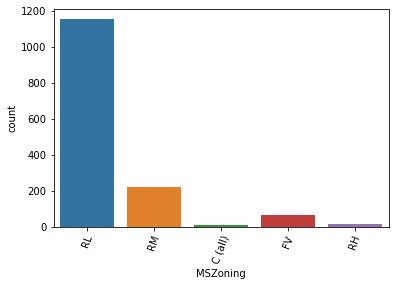

RL    78.835616
Name: MSZoning, dtype: float64
---------------------------------------------------------------------


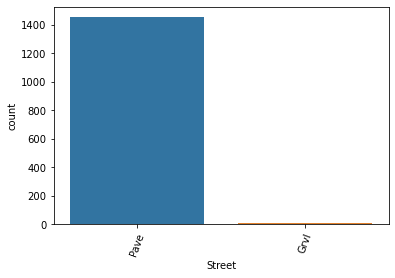

Pave    99.589041
Name: Street, dtype: float64
---------------------------------------------------------------------


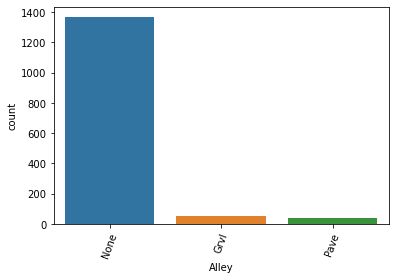

None    93.767123
Name: Alley, dtype: float64
---------------------------------------------------------------------


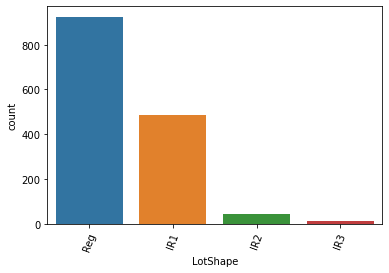

Reg    63.356164
Name: LotShape, dtype: float64
---------------------------------------------------------------------


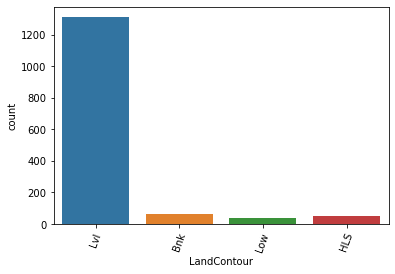

Lvl    89.794521
Name: LandContour, dtype: float64
---------------------------------------------------------------------


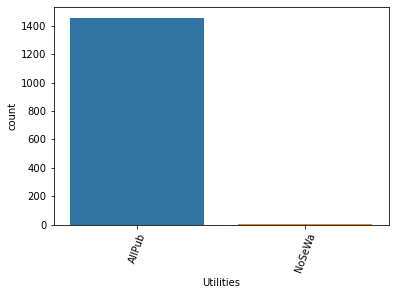

AllPub    99.931507
Name: Utilities, dtype: float64
---------------------------------------------------------------------


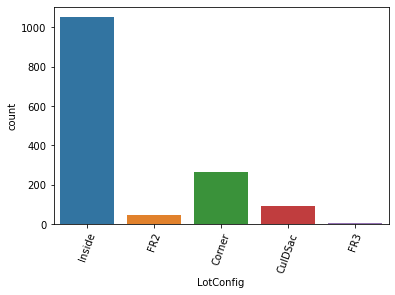

Inside    72.054795
Name: LotConfig, dtype: float64
---------------------------------------------------------------------


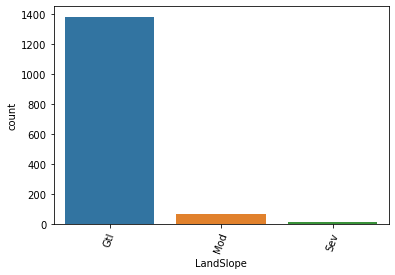

Gtl    94.657534
Name: LandSlope, dtype: float64
---------------------------------------------------------------------


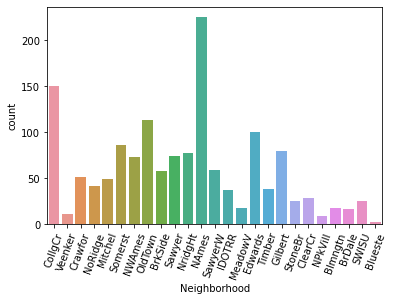

NAmes    15.410959
Name: Neighborhood, dtype: float64
---------------------------------------------------------------------


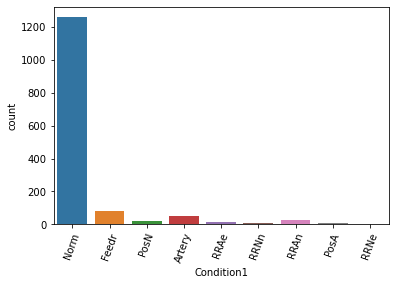

Norm    86.30137
Name: Condition1, dtype: float64
---------------------------------------------------------------------


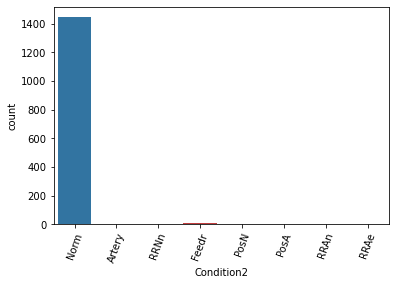

Norm    98.972603
Name: Condition2, dtype: float64
---------------------------------------------------------------------


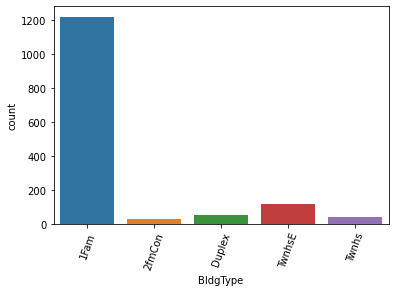

1Fam    83.561644
Name: BldgType, dtype: float64
---------------------------------------------------------------------


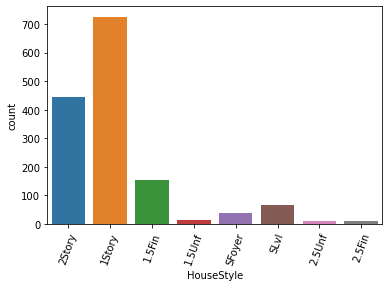

1Story    49.726027
Name: HouseStyle, dtype: float64
---------------------------------------------------------------------


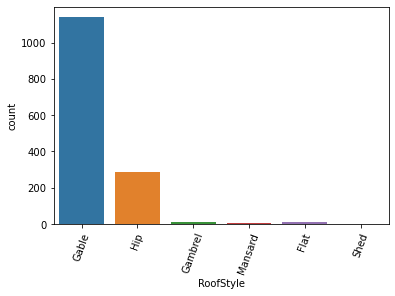

Gable    78.150685
Name: RoofStyle, dtype: float64
---------------------------------------------------------------------


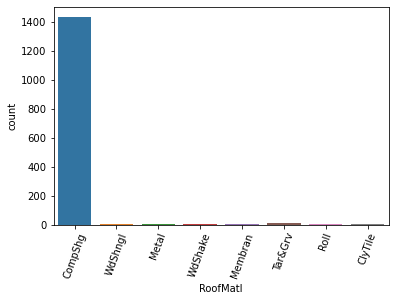

CompShg    98.219178
Name: RoofMatl, dtype: float64
---------------------------------------------------------------------


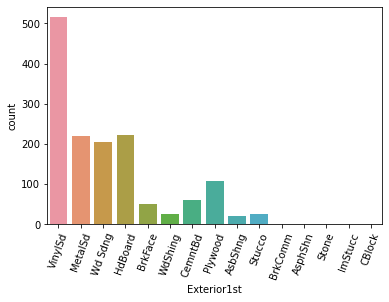

VinylSd    35.273973
Name: Exterior1st, dtype: float64
---------------------------------------------------------------------


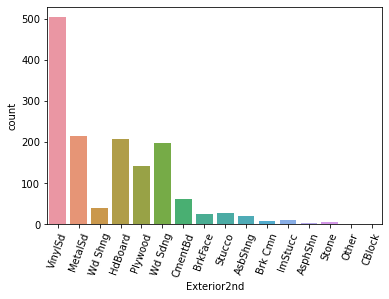

VinylSd    34.520548
Name: Exterior2nd, dtype: float64
---------------------------------------------------------------------


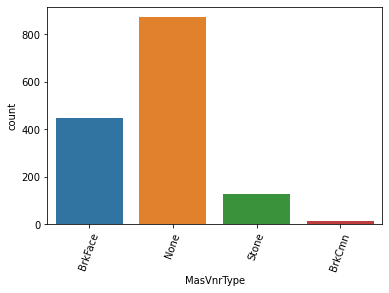

None    59.726027
Name: MasVnrType, dtype: float64
---------------------------------------------------------------------


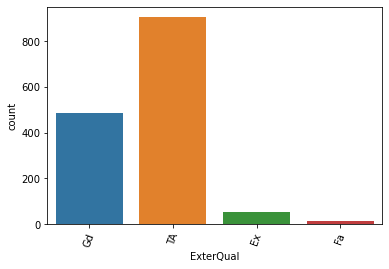

TA    62.054795
Name: ExterQual, dtype: float64
---------------------------------------------------------------------


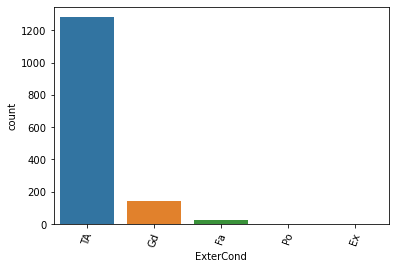

TA    87.808219
Name: ExterCond, dtype: float64
---------------------------------------------------------------------


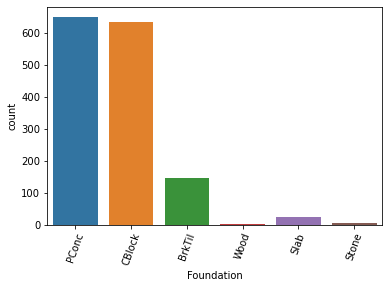

PConc    44.315068
Name: Foundation, dtype: float64
---------------------------------------------------------------------


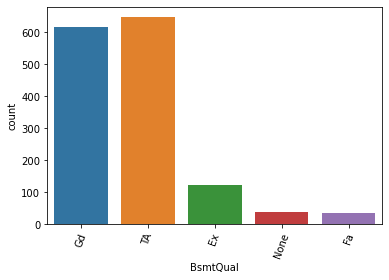

TA    44.452055
Name: BsmtQual, dtype: float64
---------------------------------------------------------------------


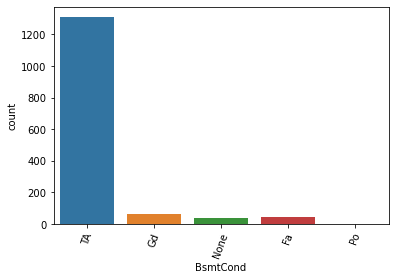

TA    89.794521
Name: BsmtCond, dtype: float64
---------------------------------------------------------------------


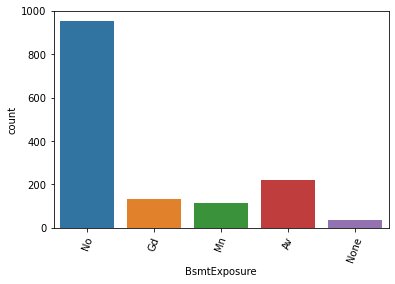

No    65.273973
Name: BsmtExposure, dtype: float64
---------------------------------------------------------------------


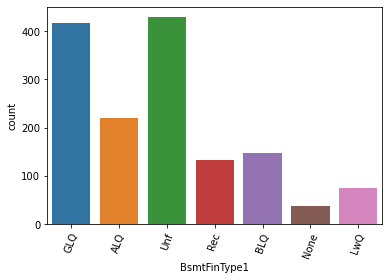

Unf    29.452055
Name: BsmtFinType1, dtype: float64
---------------------------------------------------------------------


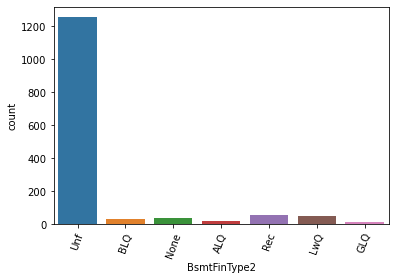

Unf    86.027397
Name: BsmtFinType2, dtype: float64
---------------------------------------------------------------------


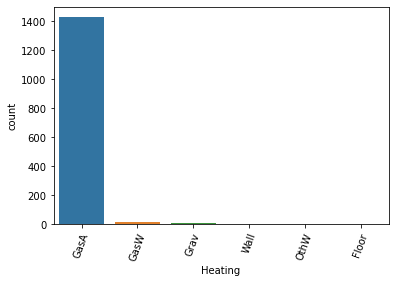

GasA    97.808219
Name: Heating, dtype: float64
---------------------------------------------------------------------


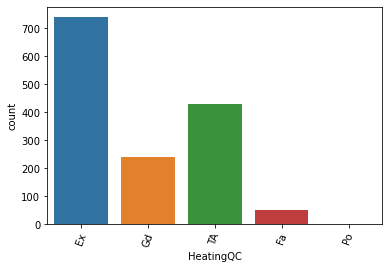

Ex    50.753425
Name: HeatingQC, dtype: float64
---------------------------------------------------------------------


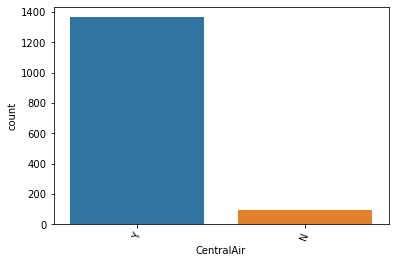

Y    93.493151
Name: CentralAir, dtype: float64
---------------------------------------------------------------------


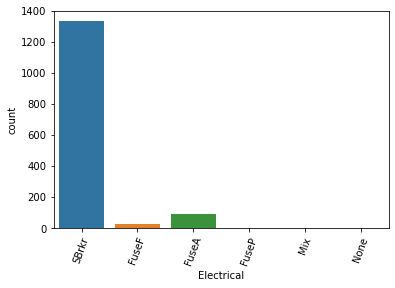

SBrkr    91.369863
Name: Electrical, dtype: float64
---------------------------------------------------------------------


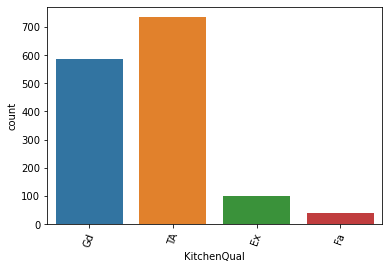

TA    50.342466
Name: KitchenQual, dtype: float64
---------------------------------------------------------------------


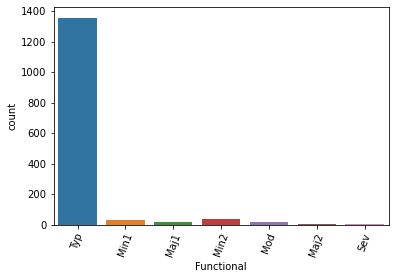

Typ    93.150685
Name: Functional, dtype: float64
---------------------------------------------------------------------


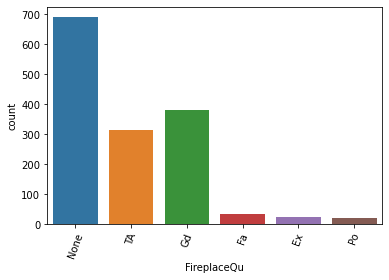

None    47.260274
Name: FireplaceQu, dtype: float64
---------------------------------------------------------------------


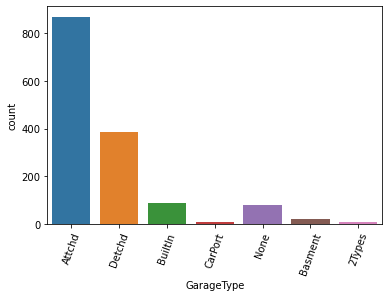

Attchd    59.589041
Name: GarageType, dtype: float64
---------------------------------------------------------------------


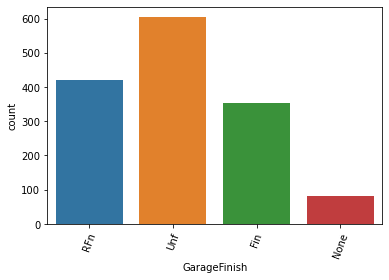

Unf    41.438356
Name: GarageFinish, dtype: float64
---------------------------------------------------------------------


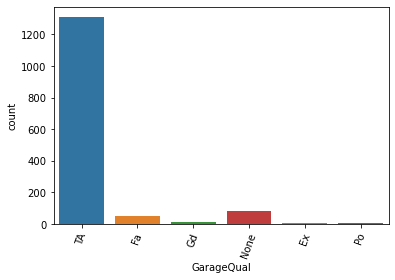

TA    89.794521
Name: GarageQual, dtype: float64
---------------------------------------------------------------------


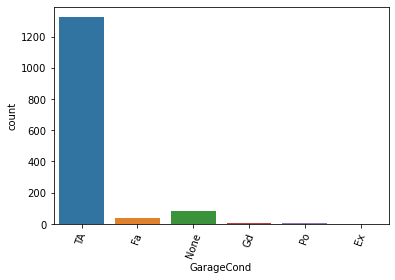

TA    90.821918
Name: GarageCond, dtype: float64
---------------------------------------------------------------------


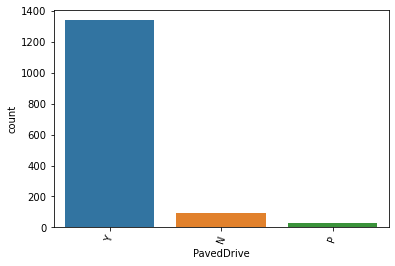

Y    91.780822
Name: PavedDrive, dtype: float64
---------------------------------------------------------------------


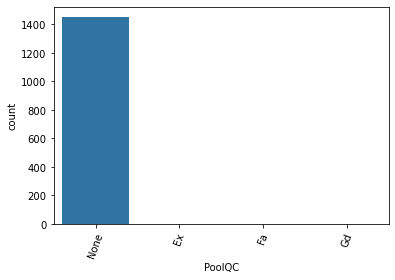

None    99.520548
Name: PoolQC, dtype: float64
---------------------------------------------------------------------


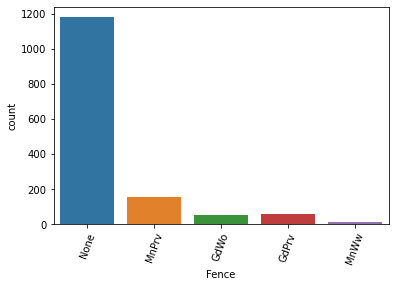

None    80.753425
Name: Fence, dtype: float64
---------------------------------------------------------------------


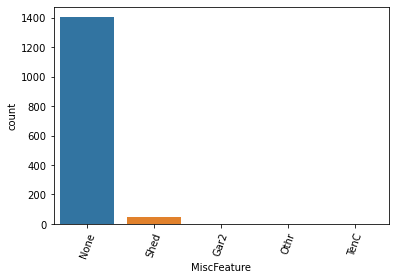

None    96.30137
Name: MiscFeature, dtype: float64
---------------------------------------------------------------------


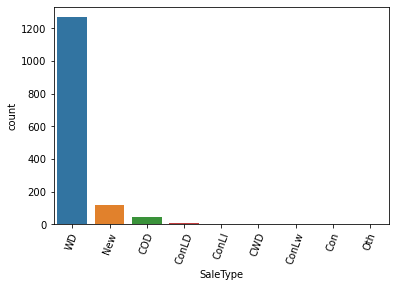

WD    86.780822
Name: SaleType, dtype: float64
---------------------------------------------------------------------


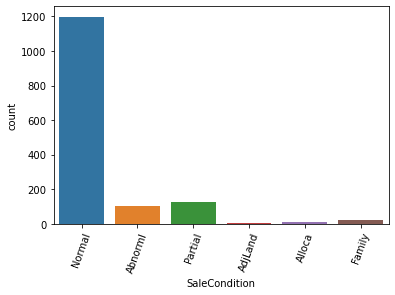

Normal    82.054795
Name: SaleCondition, dtype: float64


In [14]:
## check all the categorical columns and distribution of different values for categories
categorical_columns = df_house_price.select_dtypes(include=['object'])
for col in categorical_columns:
    print('---------------------------------------------------------------------')
    plt.xticks(rotation=70)
    sns.countplot(x =df_house_price[col], data = df_house_price) 
    plt.show()
    print(100*df_house_price[col].value_counts(normalize=True).nlargest(1))

    

**We can see there are some categorical columns where a single value is associated with a large number of rows. Hence,those columns are not important for further analysis. Let's find and drop the columns where a single value is associated with more than 85% of the rows.**

In [15]:
## The following categorical columns has a single value assoicated with more than 85% of the rows
columns=[]
for col in (categorical_columns):
        if(df_house_price[col].value_counts(normalize=True).max() >= 0.85):
            columns.append(col)
print(columns)


['Street', 'Alley', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature', 'SaleType']


In [16]:
## Lets drop them
df_house_price.drop(columns , axis=1, inplace=True)
df_house_price.shape

(1460, 60)

**Total 21 colums have been dropped**

In [17]:
## Let's have a further look at the dataset
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

In [18]:
## Check again for further null values in the categorical columns
df_categorical_with_missing=df_house_price.select_dtypes(include='object').isnull().sum()[df_house_price.select_dtypes(include='object').isnull().sum()>0].sort_values()
df_categorical_with_missing

Series([], dtype: int64)

**Impute null values in the numerical columns**

In [19]:
## check numerical colums for null values
df_house_price.select_dtypes(include=['int64','float']).isnull().sum()[df_house_price.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0].sort_values()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

In [20]:
## Let's have an insight with the null values for the following colums
df_house_price[['MasVnrArea','GarageYrBlt','LotFrontage']].describe([0.25,0.50,0.75,0.99])


,MasVnrArea,GarageYrBlt,LotFrontage
count,1452.000000,1379.000000,1201.000000
mean,103.685262,1978.506164,70.049958
std,181.066207,24.689725,24.284752
min,0.000000,1900.000000,21.000000
25%,0.000000,1961.000000,59.000000
50%,0.000000,1980.000000,69.000000
75%,166.000000,2002.000000,80.000000
99%,791.920000,2009.000000,141.000000
max,1600.000000,2010.000000,313.000000


In [21]:
## The following two columns can be imputated with the median values
## LotFrontage: Linear feet of street connected to property
## MasVnrArea: Masonry veneer area in square feet
df_house_price['LotFrontage'] = df_house_price['LotFrontage'].replace(np.nan, df_house_price['LotFrontage'].median())
df_house_price['MasVnrArea'] = df_house_price['MasVnrArea'].replace(np.nan, df_house_price['MasVnrArea'].median())

In [22]:
## Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below
## GarageYrBlt: Year garage was built
df_house_price['GarageYrBlt']=df_house_price['GarageYrBlt'].fillna(0)
df_house_price['GarageYrBlt'] = df_house_price['GarageYrBlt'].astype(int)

**In this dataframe , we have some year columns (raw attributes) - Let's try to derive some features from the raw attributes**

In [23]:
yr_cols = [col for col in df_house_price.columns if 'yr' in col.lower() or 'year' in col.lower() ]
print(yr_cols)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [24]:
# Create a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
# the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df_house_price['IsRemodelled'] = df_house_price.apply(checkForRemodel, axis=1)
df_house_price['IsRemodelled'].head()

0    0
1    0
2    1
3    1
4    0
Name: IsRemodelled, dtype: int64

In [25]:
# Create a new column named BuiltOrRemodelledAge and determine the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df_house_price['BuiltOrRemodelAge'] = df_house_price.apply(getBuiltOrRemodelAge, axis=1)
df_house_price['BuiltOrRemodelAge'].head()

0     5
1    31
2     6
3    36
4     8
Name: BuiltOrRemodelAge, dtype: int64

In [26]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
df_house_price['OldOrNewGarage'] = df_house_price['GarageYrBlt'].apply(getGarageConstructionPeriod)
df_house_price['OldOrNewGarage'].head()

0    1
1    0
2    1
3    0
4    1
Name: OldOrNewGarage, dtype: int64

**We have created new derived colums from all the year columns. We don't need year columns anymore as we are going to analyze the derived features. Let's drop them.**

In [27]:
df_house_price.drop(yr_cols, axis = 1, inplace = True)

---------------------------------------------------------------------


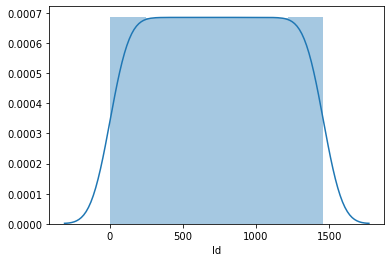

1460    0.068493
Name: Id, dtype: float64
---------------------------------------------------------------------


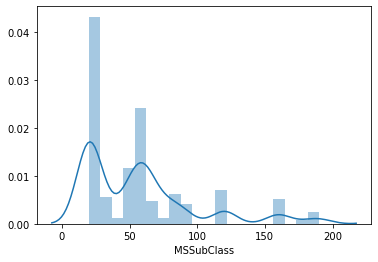

20    36.712329
Name: MSSubClass, dtype: float64
---------------------------------------------------------------------


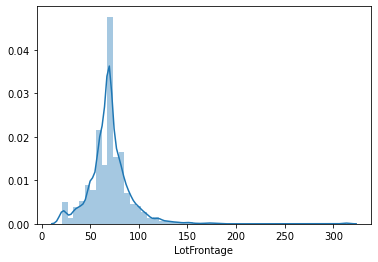

69.0    18.493151
Name: LotFrontage, dtype: float64
---------------------------------------------------------------------


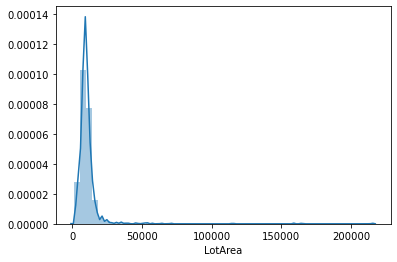

7200    1.712329
Name: LotArea, dtype: float64
---------------------------------------------------------------------


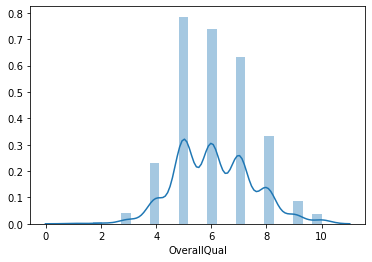

5    27.191781
Name: OverallQual, dtype: float64
---------------------------------------------------------------------


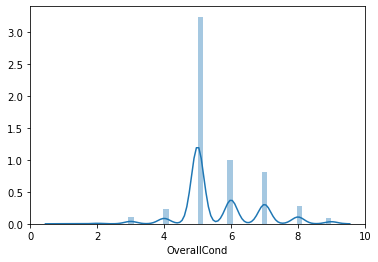

5    56.232877
Name: OverallCond, dtype: float64
---------------------------------------------------------------------


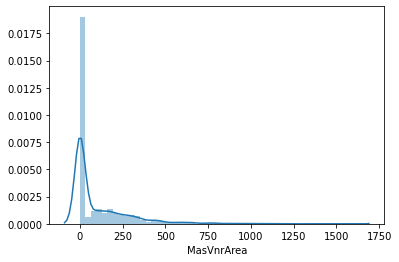

0.0    59.520548
Name: MasVnrArea, dtype: float64
---------------------------------------------------------------------


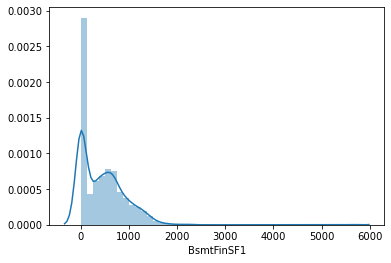

0    31.986301
Name: BsmtFinSF1, dtype: float64
---------------------------------------------------------------------


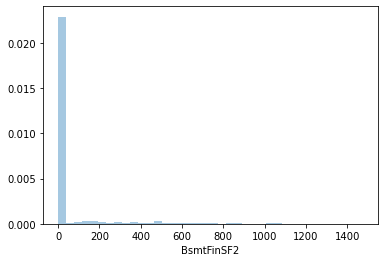

0    88.561644
Name: BsmtFinSF2, dtype: float64
---------------------------------------------------------------------


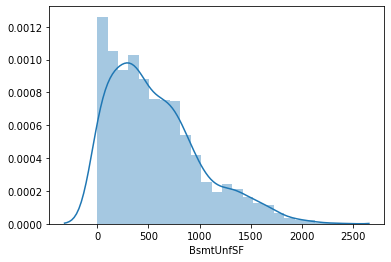

0    8.082192
Name: BsmtUnfSF, dtype: float64
---------------------------------------------------------------------


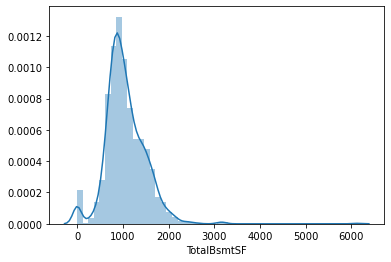

0    2.534247
Name: TotalBsmtSF, dtype: float64
---------------------------------------------------------------------


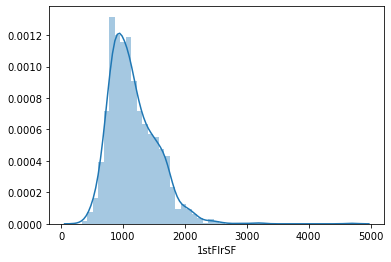

864    1.712329
Name: 1stFlrSF, dtype: float64
---------------------------------------------------------------------


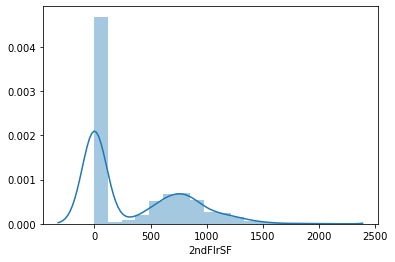

0    56.780822
Name: 2ndFlrSF, dtype: float64
---------------------------------------------------------------------


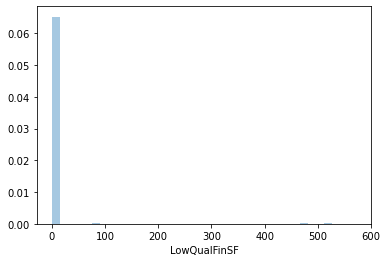

0    98.219178
Name: LowQualFinSF, dtype: float64
---------------------------------------------------------------------


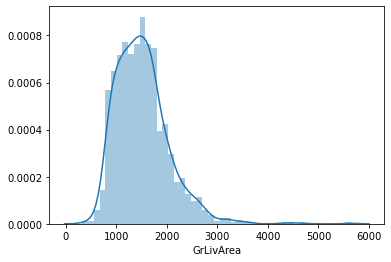

864    1.506849
Name: GrLivArea, dtype: float64
---------------------------------------------------------------------


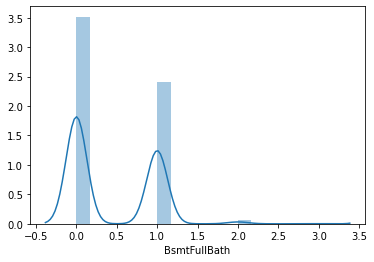

0    58.630137
Name: BsmtFullBath, dtype: float64
---------------------------------------------------------------------


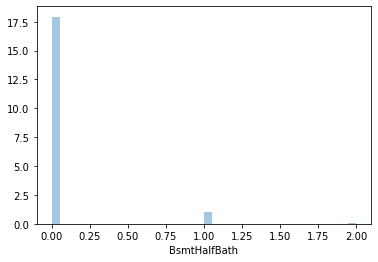

0    94.383562
Name: BsmtHalfBath, dtype: float64
---------------------------------------------------------------------


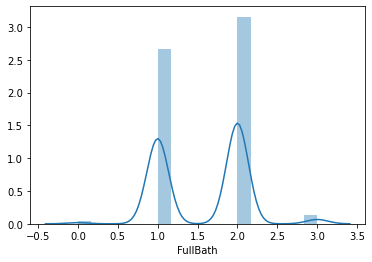

2    52.60274
Name: FullBath, dtype: float64
---------------------------------------------------------------------


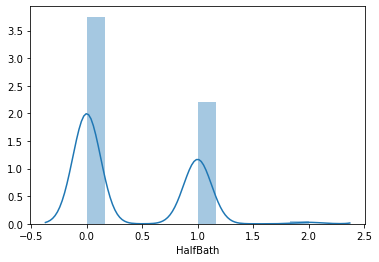

0    62.534247
Name: HalfBath, dtype: float64
---------------------------------------------------------------------


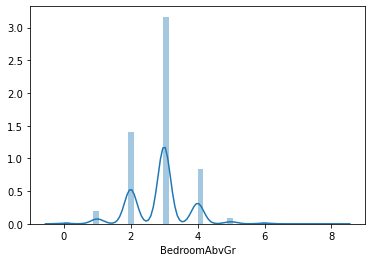

3    55.068493
Name: BedroomAbvGr, dtype: float64
---------------------------------------------------------------------


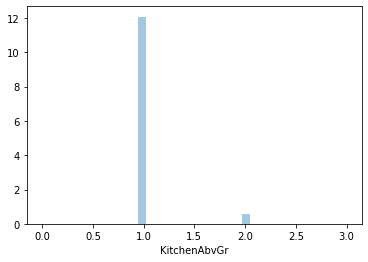

1    95.342466
Name: KitchenAbvGr, dtype: float64
---------------------------------------------------------------------


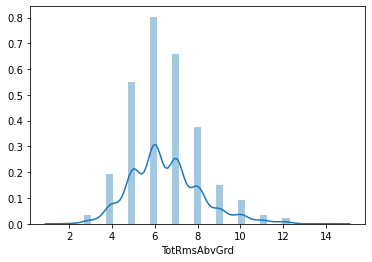

6    27.534247
Name: TotRmsAbvGrd, dtype: float64
---------------------------------------------------------------------


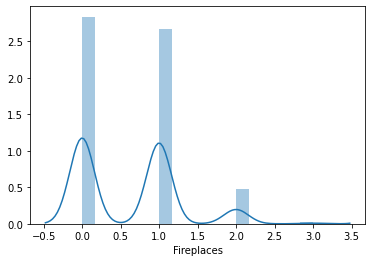

0    47.260274
Name: Fireplaces, dtype: float64
---------------------------------------------------------------------


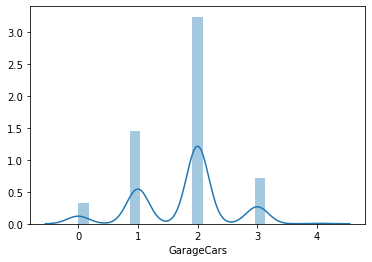

2    56.438356
Name: GarageCars, dtype: float64
---------------------------------------------------------------------


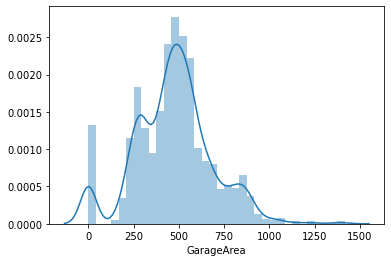

0    5.547945
Name: GarageArea, dtype: float64
---------------------------------------------------------------------


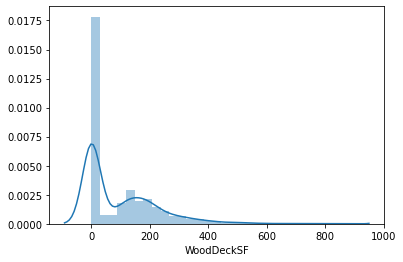

0    52.123288
Name: WoodDeckSF, dtype: float64
---------------------------------------------------------------------


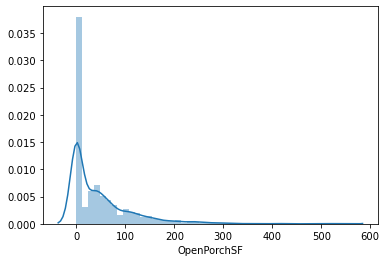

0    44.931507
Name: OpenPorchSF, dtype: float64
---------------------------------------------------------------------


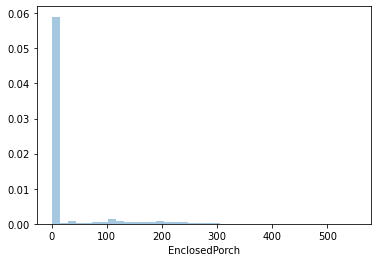

0    85.753425
Name: EnclosedPorch, dtype: float64
---------------------------------------------------------------------


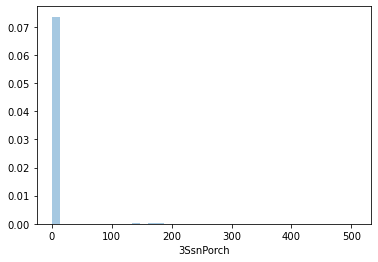

0    98.356164
Name: 3SsnPorch, dtype: float64
---------------------------------------------------------------------


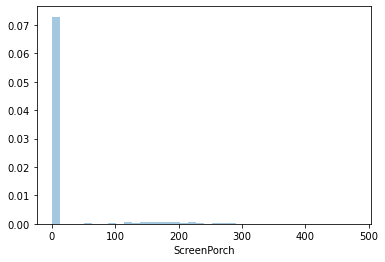

0    92.054795
Name: ScreenPorch, dtype: float64
---------------------------------------------------------------------


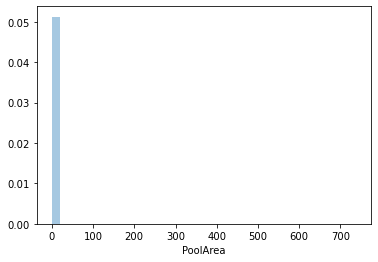

0    99.520548
Name: PoolArea, dtype: float64
---------------------------------------------------------------------


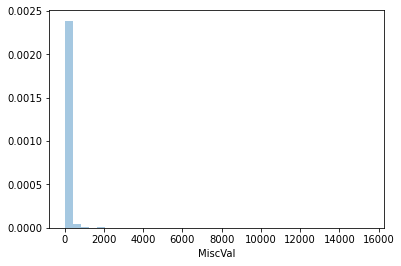

0    96.438356
Name: MiscVal, dtype: float64
---------------------------------------------------------------------


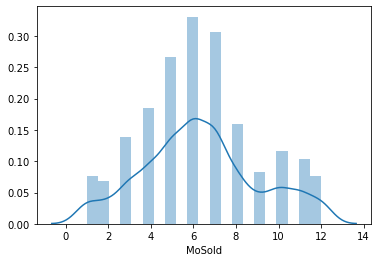

6    17.328767
Name: MoSold, dtype: float64
---------------------------------------------------------------------


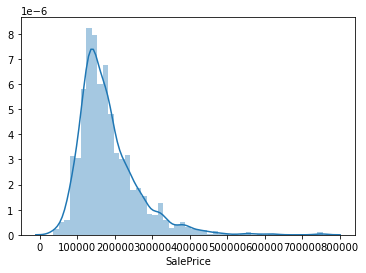

140000    1.369863
Name: SalePrice, dtype: float64
---------------------------------------------------------------------


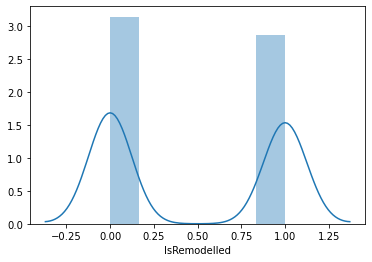

0    52.328767
Name: IsRemodelled, dtype: float64
---------------------------------------------------------------------


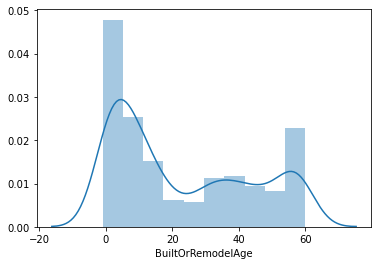

0    8.493151
Name: BuiltOrRemodelAge, dtype: float64
---------------------------------------------------------------------


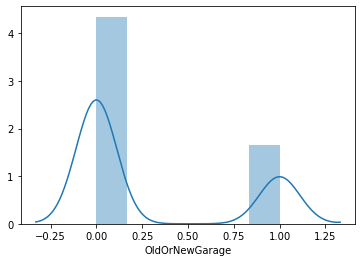

0    72.465753
Name: OldOrNewGarage, dtype: float64


In [28]:
## Check numerical columns
numerical_columns = df_house_price.select_dtypes(include=['int64', 'float'])
for col in (numerical_columns):
    print('---------------------------------------------------------------------')
    sns.distplot(df_house_price[col],);
    plt.show()
    print(100*df_house_price[col].value_counts(normalize=True).nlargest(1))


**We can see there are some numerical columns where a single value is associated with a large number of rows. Hence,those columns are not important for further analysis. Let's find and drop the columns where a single value is associated with more than 85% of the rows.**

In [29]:
## The following numerical columns has a single value assoicated with more than 85% of the rows
columns=[]
for col in (numerical_columns):
        if(df_house_price[col].value_counts(normalize=True).max() >= 0.85):
            columns.append(col)
print(columns)


['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [30]:
## Lets drop them
df_house_price.drop(columns , axis=1, inplace=True)
df_house_price.shape

(1460, 50)

In [31]:
## Since we have derived some features from the YrSold - the following variables are not important
## MoSold: Month Sold (MM)
## Let's drop it

df_house_price.drop('MoSold' , axis=1, inplace=True)
df_house_price.shape

(1460, 49)

**Check for null and duplicate values**

In [32]:
df_house_price.isnull().sum()[df_house_price.isnull().sum()>0].sort_values()

Series([], dtype: int64)

In [33]:
df_house_price[df_house_price.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


**We have no null values and no duplicate values present**

In [34]:
## Id is not important for the analysis - Let's drop it.
df_house_price.drop('Id' , axis=1, inplace=True)
df_house_price.shape

(1460, 48)

#### Outlier treatment

In [35]:
numerical_columns = df_house_price.select_dtypes(include=['int64', 'float']).columns
df_house_price[numerical_columns].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,1162.626712,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,386.587738,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,1391.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,1680.000000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,1831.250000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,2219.460000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


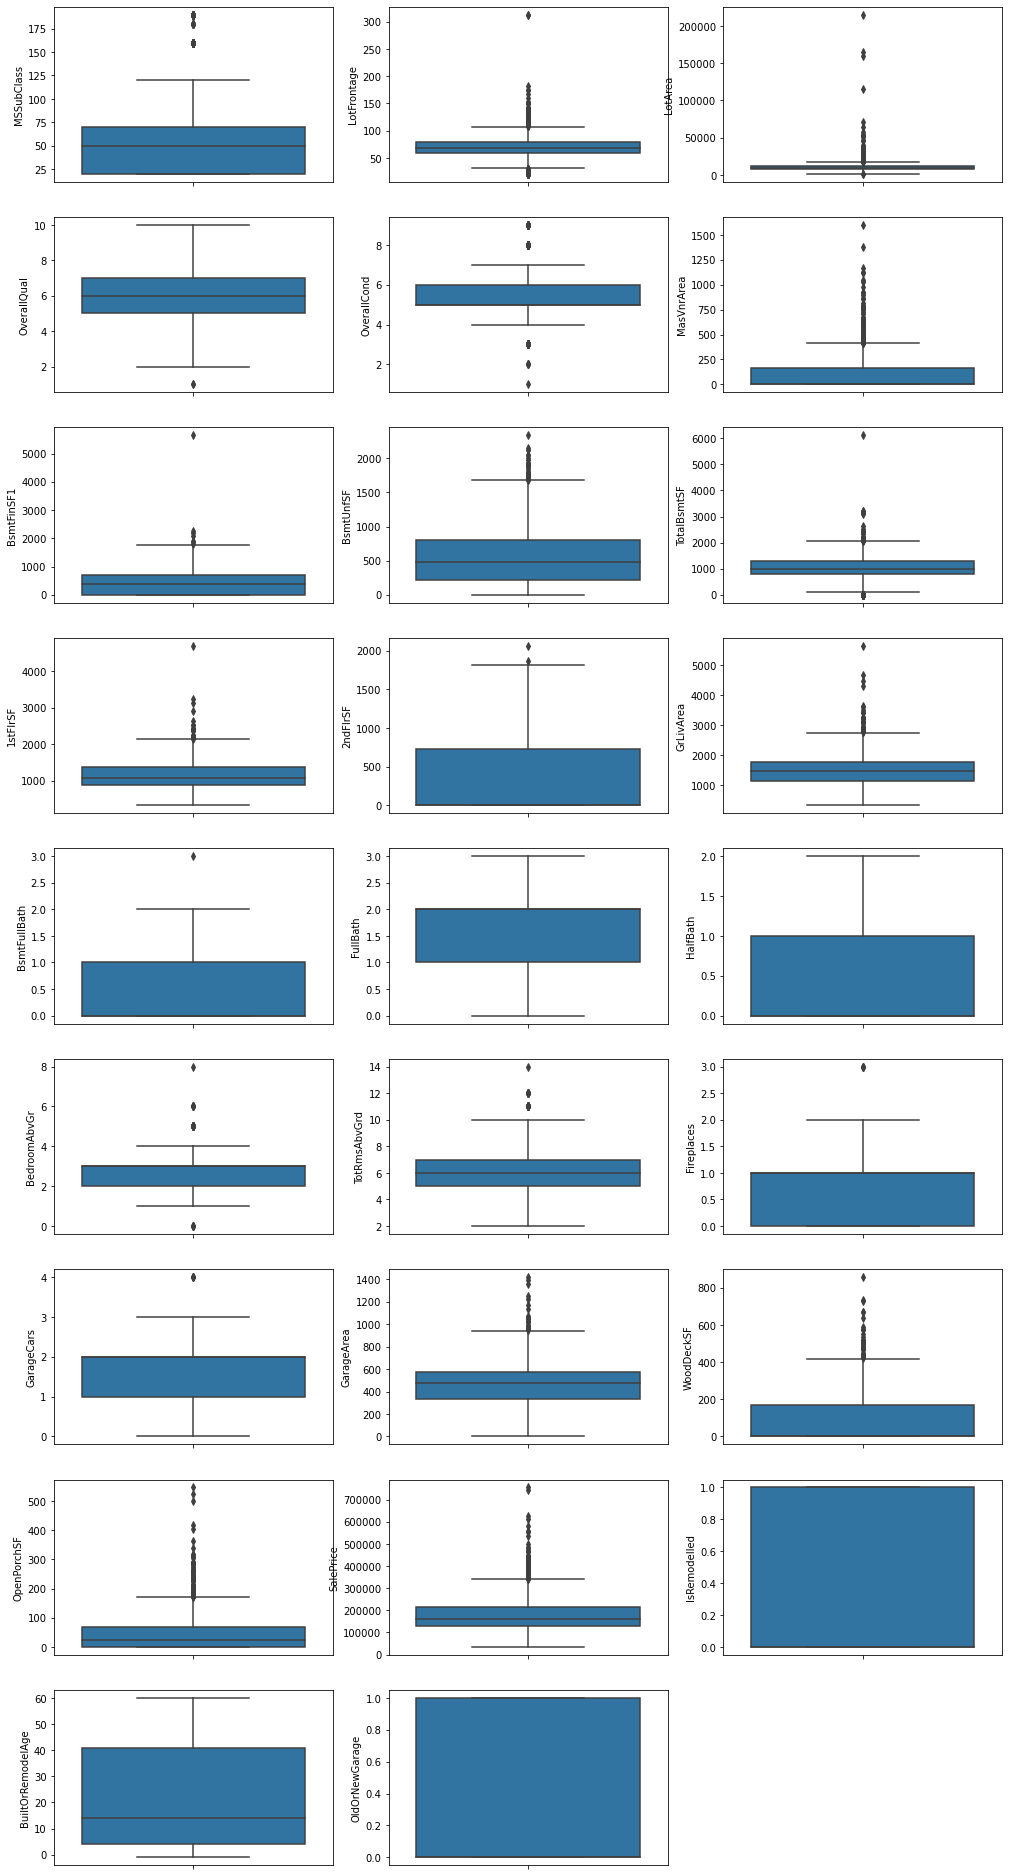

In [36]:
## Lets visualize the data
plt.figure(figsize=(17, 100))
count = 1
for col in numerical_columns:
    plt.subplot(len(numerical_columns),3,count)
    sns.boxplot(y = col, data = df_house_price)
    count=count+1
plt.show()

#### We assume that the lower quantile 0.25 and upper quantile 0.99.

In [37]:
## Drop the outliers outside 25 and 99 percentile
def drop_outliers(x):
    list = []
    for col in numerical_columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_house_price = drop_outliers(df_house_price)

In [38]:
df_house_price.shape

(1453, 48)

In [39]:
# Determine the percentage of data retained
num_data = round(100*(len(df_house_price)/1460),2)
print(num_data)

99.52


**We are able to retain 99.52% data after data cleaning**

#### Data visualization

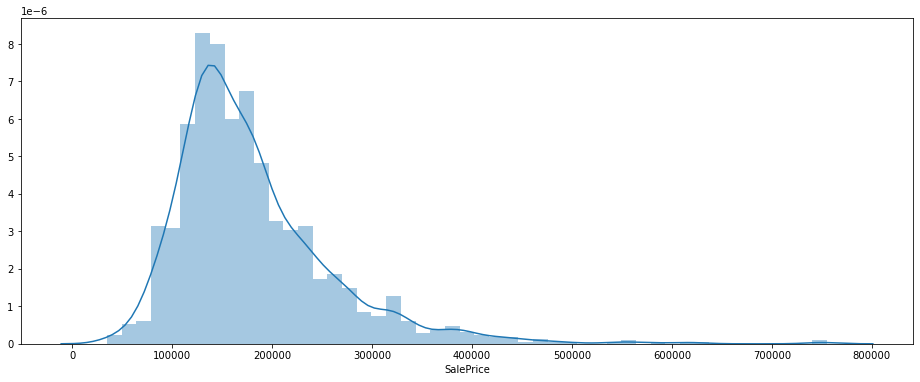

In [40]:
## Let's have a look at the distribution of the target variables
plt.figure(figsize=(16,6))
sns.distplot(df_house_price.SalePrice)
plt.show()

<Figure size 720x360 with 0 Axes>

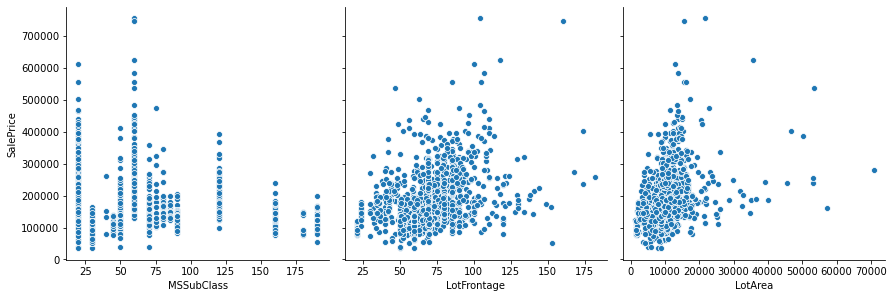

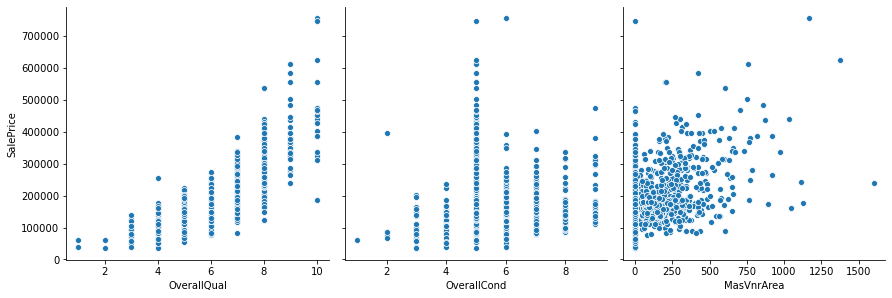

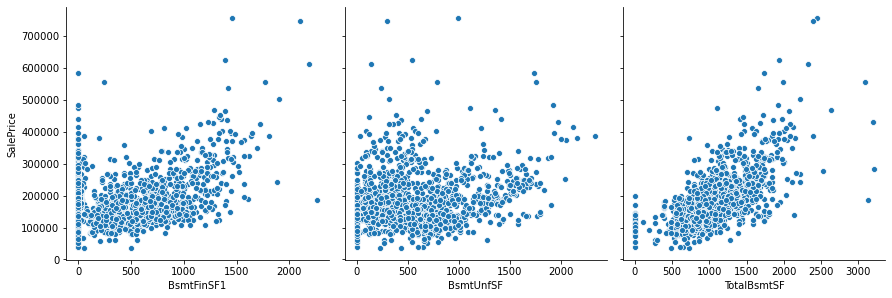

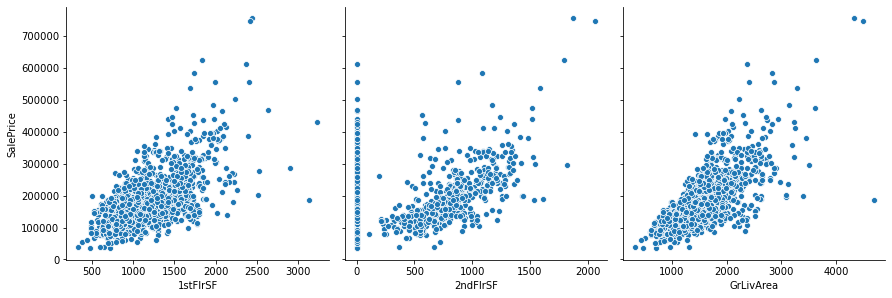

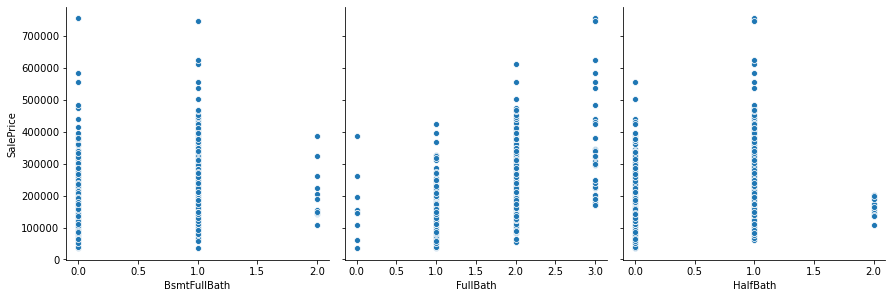

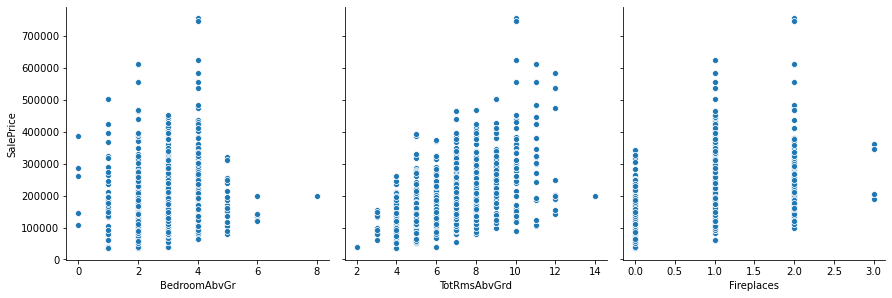

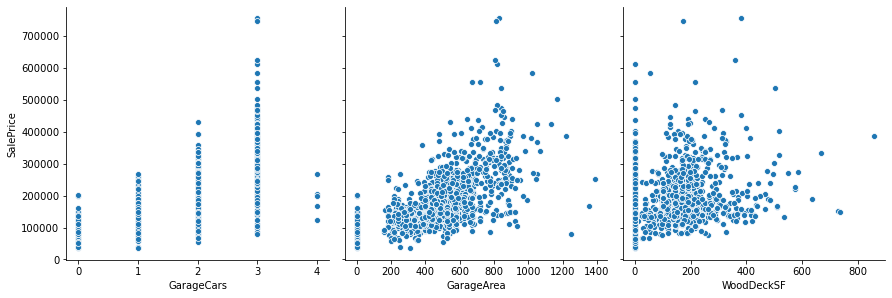

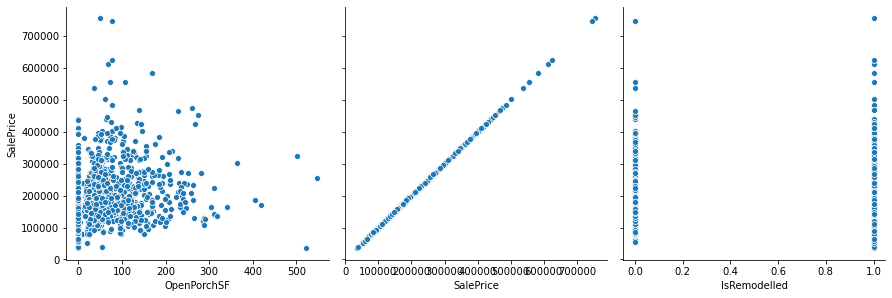

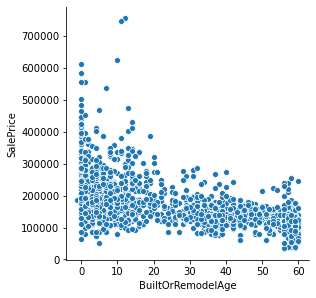

In [41]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(df_house_price, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df_house_price, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()



**Observations :**
- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis



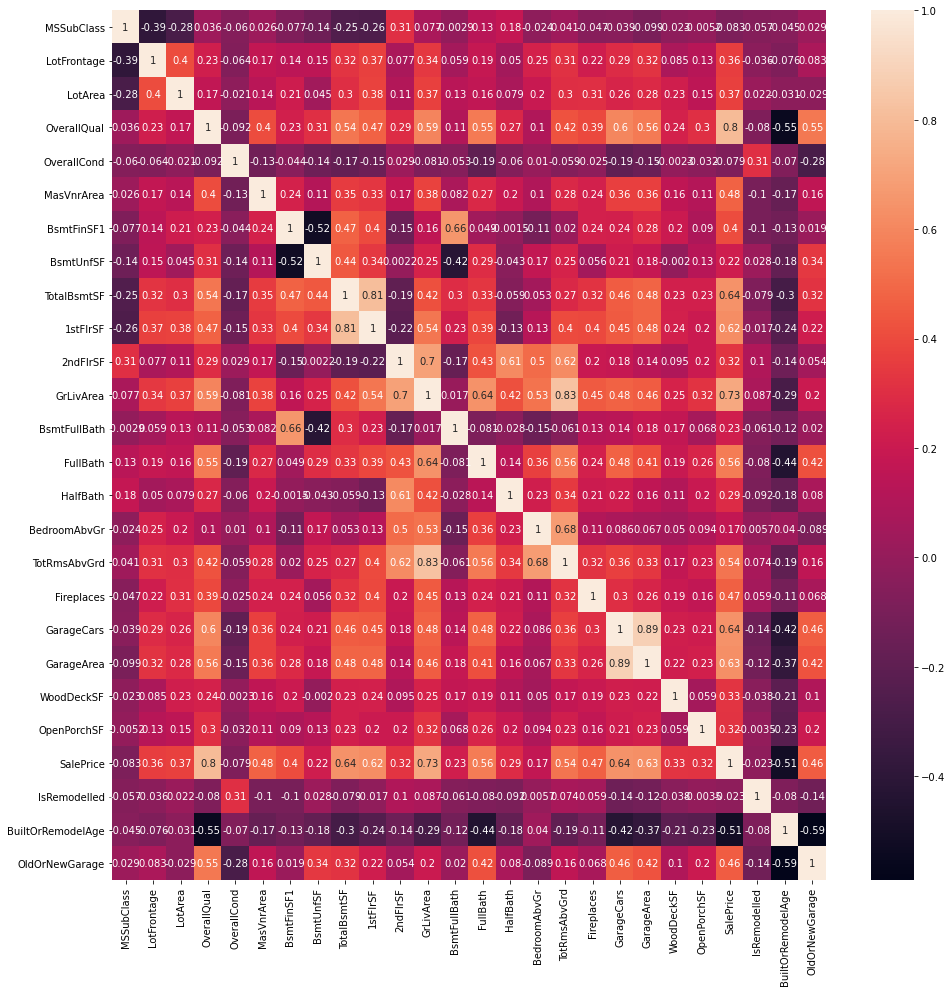

In [42]:
plt.figure(figsize=(16,16))
sns.heatmap(df_house_price[list(df_house_price.dtypes[df_house_price.dtypes!='object'].index)].corr(),annot=True)
plt.show()



**Removing following columns which shows high correlation**

- TotRmsAbvGrd and GrLivArea show 83%
- Garage Area and Garage Cars show 89%



In [43]:
## Removing the highly correlated variables
df_house_price.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)

In [44]:
## Check the shape of the data
df_house_price.shape

(1453, 46)

## 03. Data preparation

- Converting the ordered categorical data to numeric
- Create dummies for unordered categorical ones.

In [45]:
# Since the values of the following fields are ordered list, we shall assign values to them in sequence

# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

df_house_price['LotShape'] = df_house_price['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df_house_price['ExterQual'] = df_house_price['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df_house_price['BsmtQual'] = df_house_price['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['BsmtExposure'] = df_house_price['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df_house_price['BsmtFinType1'] = df_house_price['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
df_house_price['HeatingQC'] = df_house_price['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['KitchenQual'] = df_house_price['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['FireplaceQu'] = df_house_price['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df_house_price['GarageFinish'] = df_house_price['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df_house_price['BldgType'] = df_house_price['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
df_house_price['HouseStyle'] = df_house_price['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df_house_price['Fence'] = df_house_price['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
df_house_price['LotConfig'] = df_house_price['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
df_house_price['MasVnrType'] = df_house_price['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df_house_price['SaleCondition'] = df_house_price['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
df_house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,60,RL,65.0,8450,3,5,CollgCr,1,4,7,...,2,2,0,61,0,1,208500,0,5,1
1,20,RL,80.0,9600,3,2,Veenker,1,1,6,...,2,2,298,0,0,1,181500,0,31,0
2,60,RL,68.0,11250,2,5,CollgCr,1,4,7,...,2,2,0,42,0,1,223500,1,6,1
3,70,RL,60.0,9550,2,4,Crawfor,1,4,7,...,1,3,0,35,0,0,140000,1,36,0
4,60,RL,84.0,14260,2,2,NoRidge,1,4,8,...,2,3,192,84,0,1,250000,0,8,1


In [46]:
df_house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'Fence', 'SaleCondition', 'SalePrice', 'IsRemodelled',
       'BuiltOrRemodelAge', 'OldOrNewGarage'],
      dtype='object')

In [47]:
# For the following columns create dummies

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df_house_price['MSZoning'], prefix='MSZoning', drop_first = True)
df_house_price = pd.concat([df_house_price, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df_house_price['Neighborhood'], prefix='Neighborhood', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df_house_price['RoofStyle'], prefix='RoofStyle', drop_first = True)
df_house_price = pd.concat([df_house_price, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df_house_price['Exterior1st'], prefix='Exterior1st', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df_house_price['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df_house_price['Foundation'], prefix='Foundation', drop_first = True)
df_house_price = pd.concat([df_house_price, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df_house_price['GarageType'], prefix='GarageType', drop_first = True)
df_house_price = pd.concat([df_house_price, d_GarageType], axis = 1)

df_house_price.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,3,5,CollgCr,1,4,7,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,3,2,Veenker,1,1,6,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,2,5,CollgCr,1,4,7,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,2,4,Crawfor,1,4,7,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,2,2,NoRidge,1,4,8,...,1,0,0,0,1,0,0,0,0,0


In [48]:
# drop the below columns as we now have new columns derived from these columns

df_house_price = df_house_price.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)

df_house_price.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LotConfig,BldgType,HouseStyle,OverallQual,OverallCond,MasVnrType,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,3,5,1,4,7,5,1,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,3,2,1,1,6,8,0,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,2,5,1,4,7,5,1,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,2,4,1,4,7,5,0,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,2,2,1,4,8,5,1,...,1,0,0,0,1,0,0,0,0,0


In [49]:
## Checking if all the columns are converted to numeric
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(37), uint8(73)
memory usage: 557.6 KB


In [50]:
print(df_house_price.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(2), int64(37), uint8(73)
memory usage: 557.6 KB
None


**We have converted all the columns to numerical ones.**

## 04. Train Test Split

#### Creating the train and test dataset on the validation purposes.

In [51]:
np.random.seed(0)
df_train,df_test = train_test_split(df_house_price,train_size=0.7,test_size=0.3,random_state=42)

In [52]:
df_house_price.shape

(1453, 112)

In [53]:
df_train.shape

(1017, 112)

In [54]:
df_test.shape

(436, 112)

**The scale for independent variable variable - SalePrice and dependent numeric features are different. Let's perform the standard scaling on numeric variables**

<p>For details please refer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">here.</a></p>

In [56]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
            'MasVnrArea','BsmtFinSF1',
           'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
           'Fireplaces','GarageCars',
           'WoodDeckSF','OpenPorchSF','IsRemodelled',
       'BuiltOrRemodelAge',
           'SalePrice']

#num_col=extract_numerical(df_house_price)

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])



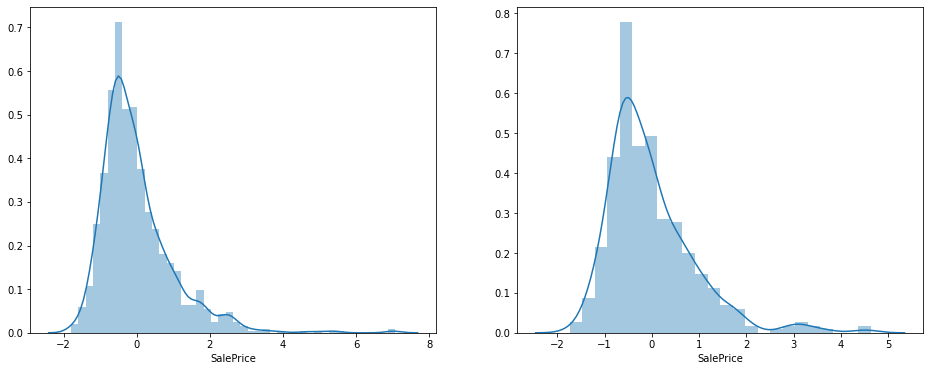

In [57]:
## Lets check the distribution after scaling
## The same distribution retains after the scaling
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

#### Splittig the dependent and independent variables

In [58]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [59]:
y_test = df_test.pop('SalePrice')
X_test = df_test

## 05. Recursive Feature Elimination

<P>Let's try to find optimal number of Features using RFE. Since we have 112 features. 5- Fold cross validation will try to generate 560 fits which is very time consuming.Hence , try to find out 50 optimal features using RFE.</P>

In [60]:
len(X_train.columns)

111

In [61]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [62]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [63]:
## Let's check for the selected columns
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
print(rfe_sel_columns)

['BldgType', 'OverallQual', 'ExterQual', 'BsmtFinSF1', 'GrLivArea', 'KitchenQual', 'GarageCars', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_Built

**Lets filter the train and test set for the RFE selected columns**

In [64]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## 06. Model building and Evaluation

#### Ridge Regression

In [65]:
# list pf alphas

folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.1s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [66]:
## display the mean scores

cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010143,0.007398,0.002064,0.004760,0.001,{'alpha': 0.001},0.840635,0.848024,0.865424,0.755833,...,0.861583,0.867391,0.859499,0.863409,0.861087,0.878646,0.866187,0.865165,0.864977,0.005090
1,0.006760,0.008394,0.001586,0.004758,0.010,{'alpha': 0.01},0.840609,0.848113,0.865413,0.756159,...,0.861582,0.867390,0.859498,0.863408,0.861086,0.878646,0.866186,0.865165,0.864977,0.005090
2,0.008319,0.007448,0.001678,0.004671,0.100,{'alpha': 0.1},0.840350,0.848903,0.865327,0.758981,...,0.861540,0.867339,0.859487,0.863365,0.861043,0.878597,0.866137,0.865117,0.864933,0.005085
3,0.004708,0.007192,0.003230,0.006201,0.200,{'alpha': 0.2},0.840067,0.849632,0.865282,0.761439,...,0.861451,0.867234,0.859456,0.863275,0.860954,0.878497,0.866036,0.865019,0.864842,0.005076
4,0.004815,0.007363,0.001565,0.004694,0.500,{'alpha': 0.5},0.839272,0.851308,0.865295,0.766523,...,0.861109,0.866833,0.859291,0.862918,0.860615,0.878111,0.865661,0.864642,0.864491,0.005044
5,0.005192,0.008037,0.001559,0.004676,0.900,{'alpha': 0.9},0.838334,0.852899,0.865433,0.770741,...,0.860606,0.866266,0.858982,0.862389,0.860121,0.877567,0.865134,0.864099,0.863981,0.005012
6,0.005797,0.007782,0.001561,0.004684,1.000,{'alpha': 1.0},0.838119,0.853225,0.865474,0.771553,...,0.860477,0.866125,0.858896,0.862255,0.859995,0.877434,0.865002,0.863964,0.863853,0.005005
7,0.005187,0.006987,0.001688,0.005065,5.000,{'alpha': 5.0},0.832827,0.859270,0.866306,0.785665,...,0.855871,0.861532,0.855283,0.857662,0.855674,0.873359,0.860605,0.859598,0.859517,0.005023
8,0.003622,0.006174,0.001576,0.004729,10.000,{'alpha': 10.0},0.829518,0.862226,0.865876,0.792919,...,0.851837,0.857717,0.851771,0.853836,0.851973,0.870267,0.856921,0.856241,0.855883,0.005200
9,0.004688,0.007161,0.004798,0.007335,20.000,{'alpha': 20.0},0.825677,0.865079,0.863887,0.800906,...,0.846620,0.852761,0.846952,0.848896,0.847102,0.866417,0.852144,0.852075,0.851170,0.005512


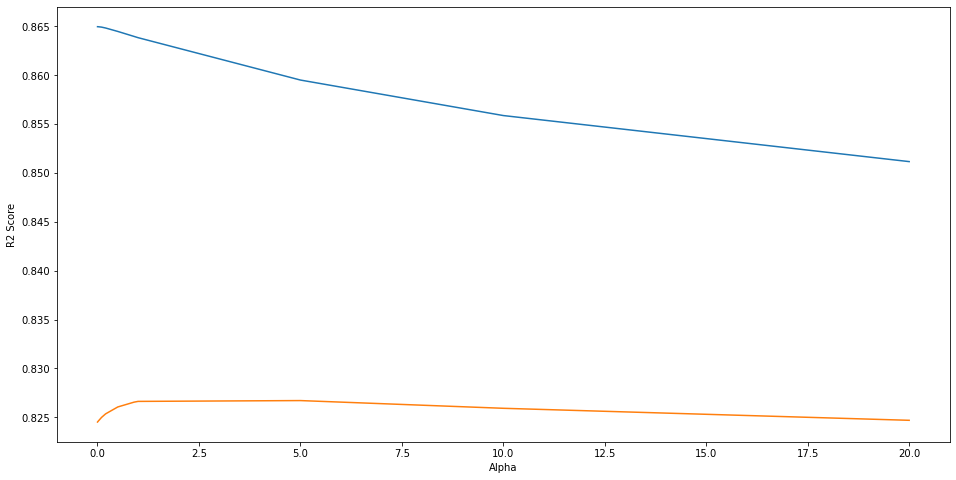

In [67]:
# plotting mean test and train scoes with alpha 

plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [68]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 5.0}

In [69]:
# check the coefficient values with lambda = 5.0
from sklearn.metrics import r2_score
ridge = Ridge(alpha = 5)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8586319842653258
0.8532420182120601


In [87]:
# Check the mean squared error
mean_squared_error(y_test, ridge.predict(X_test))

0.35339339653436075

In [71]:
# Put the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,BldgType,-0.1086
1,OverallQual,0.2394
2,ExterQual,0.1542
3,BsmtFinSF1,0.1853
4,GrLivArea,0.3213
5,KitchenQual,0.1500
6,GarageCars,0.1329
7,MSZoning_FV,0.0549
8,MSZoning_RH,0.1339
9,MSZoning_RL,0.0673


In [72]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot
ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'BldgType': -0.1086,
 'OverallQual': 0.2394,
 'ExterQual': 0.1542,
 'BsmtFinSF1': 0.1853,
 'GrLivArea': 0.3213,
 'KitchenQual': 0.15,
 'GarageCars': 0.1329,
 'MSZoning_FV': 0.0549,
 'MSZoning_RH': 0.1339,
 'MSZoning_RL': 0.0673,
 'MSZoning_RM': 0.0326,
 'Neighborhood_BrkSide': -0.0945,
 'Neighborhood_ClearCr': -0.0086,
 'Neighborhood_CollgCr': -0.1821,
 'Neighborhood_Edwards': -0.2544,
 'Neighborhood_Gilbert': -0.167,
 'Neighborhood_IDOTRR': -0.155,
 'Neighborhood_Mitchel': -0.2018,
 'Neighborhood_NAmes': -0.2187,
 'Neighborhood_NWAmes': -0.1948,
 'Neighborhood_NoRidge': 0.3996,
 'Neighborhood_NridgHt': 0.3701,
 'Neighborhood_OldTown': -0.3168,
 'Neighborhood_SWISU': -0.3033,
 'Neighborhood_Sawyer': -0.1685,
 'Neighborhood_SawyerW': -0.209,
 'Neighborhood_StoneBr': 0.2903,
 'Neighborhood_Timber': -0.0731,
 'Exterior1st_BrkComm': -0.0641,
 'Exterior1st_CemntBd': -0.126,
 'Exterior1st_HdBoard': -0.0614,
 'Exterior1st_MetalSd': 0.0093,
 'Exterior1st_Plywood': -0.0807,
 'Exterior1st_Stone

In [73]:
# Do an RFE to minimise the features to 15
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [74]:
# Method to get the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(find)
temp1_df = temp1_df.sort_values(by=['Coefficient'], ascending=False)
temp1_df = temp1_df.head(10)
temp1_df

,Features,rfe_support,rfe_ranking,Coefficient
7,Neighborhood_NoRidge,True,1,0.3996
8,Neighborhood_NridgHt,True,1,0.3701
2,GrLivArea,True,1,0.3213
13,Exterior2nd_ImStucc,True,1,0.2949
10,Neighborhood_StoneBr,True,1,0.2903
0,OverallQual,True,1,0.2394
1,BsmtFinSF1,True,1,0.1853
3,KitchenQual,True,1,0.1500
5,MSZoning_RH,True,1,0.1339
6,MSZoning_RL,True,1,0.0673


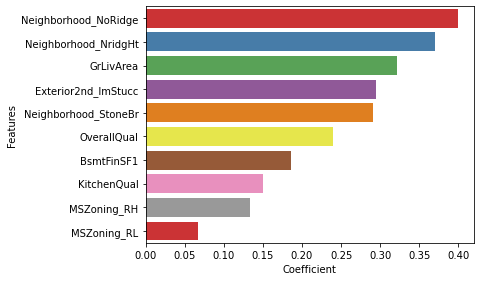

In [75]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp1_df)
plt.show()


#### Lasso Regression

In [76]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [77]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005823,0.006979,0.003242,0.006490,0.001,{'alpha': 0.001},0.833170,0.854039,0.864125,0.778811,...,0.855512,0.860889,0.855031,0.856837,0.854922,0.872112,0.859950,0.858664,0.858750,0.004848
1,0.006751,0.008382,0.001576,0.004729,0.010,{'alpha': 0.01},0.817699,0.868541,0.855724,0.799694,...,0.827340,0.835503,0.829607,0.832723,0.829232,0.850427,0.832517,0.837382,0.833929,0.006162
2,0.005190,0.006990,0.000000,0.000000,0.100,{'alpha': 0.1},0.765728,0.825862,0.771294,0.817503,...,0.773386,0.781929,0.776391,0.778590,0.775376,0.800226,0.782355,0.782006,0.779628,0.007788
3,0.003865,0.006270,0.001562,0.004687,1.000,{'alpha': 1.0},-0.010767,-0.004397,-0.002147,-0.044848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.007815,0.007815,0.000140,0.000420,5.000,{'alpha': 5.0},-0.010767,-0.004397,-0.002147,-0.044848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.005322,0.008212,0.001562,0.004686,10.000,{'alpha': 10.0},-0.010767,-0.004397,-0.002147,-0.044848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.003728,0.006126,0.003124,0.006248,20.000,{'alpha': 20.0},-0.010767,-0.004397,-0.002147,-0.044848,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


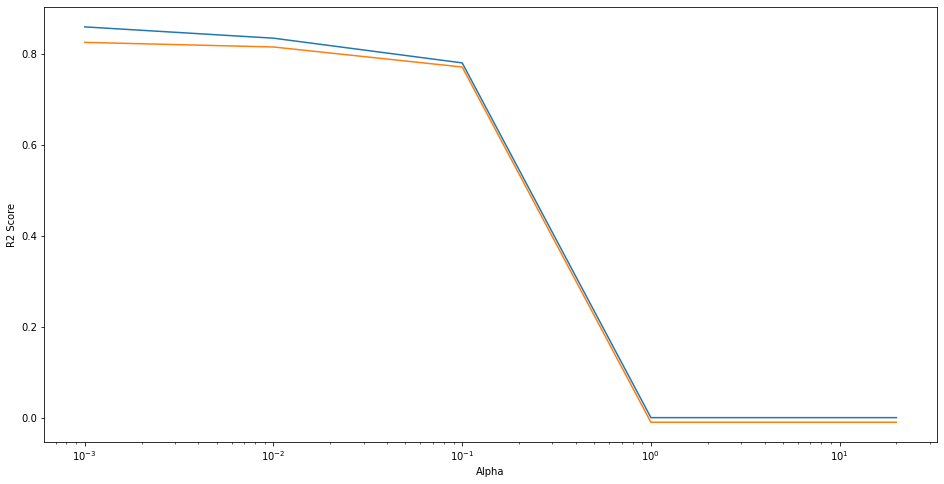

In [78]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [79]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [80]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.857238154018731
0.8513688003992687


In [81]:
# Check the mean squared error
mean_squared_error(y_test, lasso.predict(X_test))

0.12648094810492067

In [82]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,BldgType,-0.1114
1,OverallQual,0.2370
2,ExterQual,0.1509
3,BsmtFinSF1,0.1808
4,GrLivArea,0.3244
5,KitchenQual,0.1512
6,GarageCars,0.1268
7,MSZoning_FV,0.0157
8,MSZoning_RH,0.0279
9,Neighborhood_BrkSide,-0.0806


In [83]:
# Put the Features and Coefficients in dictionary
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict

{'BldgType': -0.11142407255782998,
 'OverallQual': 0.23699076641089625,
 'ExterQual': 0.15090995907430396,
 'BsmtFinSF1': 0.18083317465344445,
 'GrLivArea': 0.3244219538312575,
 'KitchenQual': 0.15121225189666346,
 'GarageCars': 0.1268140033280267,
 'MSZoning_FV': 0.015663978768319962,
 'MSZoning_RH': 0.02787921089326189,
 'MSZoning_RL': 0.0,
 'MSZoning_RM': -0.0,
 'Neighborhood_BrkSide': -0.0805661164643589,
 'Neighborhood_ClearCr': 0.0,
 'Neighborhood_CollgCr': -0.139132815431639,
 'Neighborhood_Edwards': -0.2335655247981326,
 'Neighborhood_Gilbert': -0.11889456221744961,
 'Neighborhood_IDOTRR': -0.17223097728175826,
 'Neighborhood_Mitchel': -0.1671643636607831,
 'Neighborhood_NAmes': -0.18228764438558906,
 'Neighborhood_NWAmes': -0.15768638832354392,
 'Neighborhood_NoRidge': 0.490332507720354,
 'Neighborhood_NridgHt': 0.4430559318808302,
 'Neighborhood_OldTown': -0.3331940677943687,
 'Neighborhood_SWISU': -0.30807840068612613,
 'Neighborhood_Sawyer': -0.13701566743265267,
 'Neighbor

In [84]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [85]:
# Method to get the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temp dataframe for further display in the bar plot

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(find)
temp2_df = temp2_df.sort_values(by=['Coefficient'], ascending=False)
temp2_df = temp2_df.head(10)
temp2_df

,Features,rfe_support,rfe_ranking,Coefficient
6,Neighborhood_NoRidge,True,1,0.490333
7,Neighborhood_NridgHt,True,1,0.443056
10,Neighborhood_StoneBr,True,1,0.363700
12,Exterior2nd_ImStucc,True,1,0.340844
3,GrLivArea,True,1,0.324422
0,OverallQual,True,1,0.236991
2,BsmtFinSF1,True,1,0.180833
4,KitchenQual,True,1,0.151212
1,ExterQual,True,1,0.150910
11,Exterior1st_Stucco,True,1,0.008152


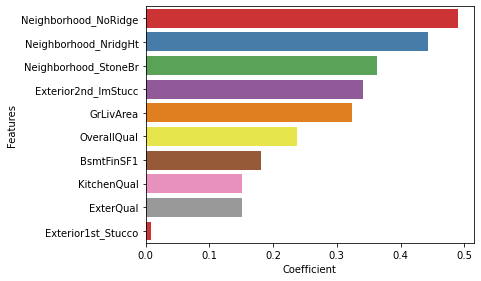

In [86]:
# bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temp2_df)
plt.show()